In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd


# scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler



# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")



x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [2]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

In [3]:
from sklearn.tree import DecisionTreeRegressor
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)


regressor = DecisionTreeRegressor()


regressor.fit(x_train,y_train.ravel())

# Predicting the target values of the test set

y_pred=regressor.predict(x_test)


In [4]:
regressor.fit(x_train, y_train)
print(regressor.score(x_train,y_train))

1.0


In [5]:
#accuracy on testdata on Model
regressor.fit(x_test, y_test)
print(regressor.score(x_test,y_test))

1.0


In [6]:
y_test

array([[0.61631094],
       [0.01857046],
       [0.14921329],
       [0.58156264],
       [0.00415142],
       [0.12877311],
       [0.05176594],
       [0.32781924],
       [0.        ],
       [0.10882414],
       [0.11937697],
       [0.06136807],
       [0.13534883]])

In [7]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

In [8]:
y_test

array([[0.61631094],
       [0.01857046],
       [0.14921329],
       [0.58156264],
       [0.00415142],
       [0.12877311],
       [0.05176594],
       [0.32781924],
       [0.        ],
       [0.10882414],
       [0.11937697],
       [0.06136807],
       [0.13534883]])

In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [10]:





def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regressor.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.027097196729378957

RMSE:
 0.1646122617831945

MAPE:
 inf

SMAPE:
 74.42

 Adj R2 score:
 0.16505740248849077


C:\Users\sachi\AppData\Local\Temp\ipykernel_6804\4261787059.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
y_test=scaler.inverse_transform(y_test)

In [13]:
y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [14]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

    Actual Effort  Predicted Effort
0         39479.0           63694.0
1          1755.0            4300.0
2         10000.0            6800.0
3         37286.0           18500.0
4           845.0            1060.0
5          8710.0            6800.0
6          3850.0            4150.0
7         21272.0            1798.0
8           583.0            2330.0
9          7451.0            1798.0
10         8117.0            5279.0
11         4456.0            4224.0
12         9125.0           13700.0


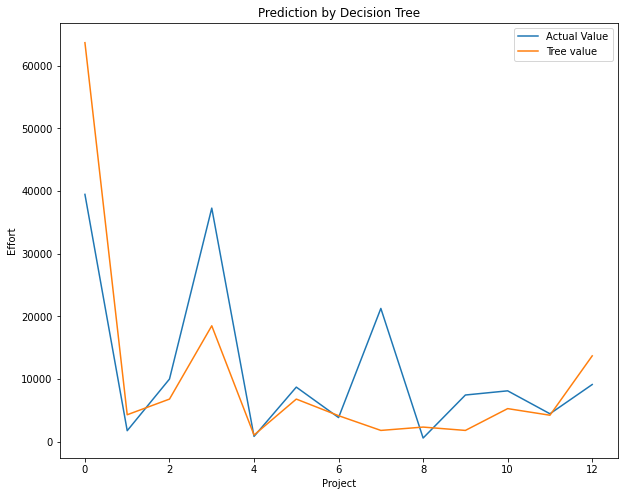

In [15]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Tree value")
plt.title("Prediction by Decision Tree")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()